<a href="https://colab.research.google.com/github/allertsa/my-data-analyst-portfolio/blob/main/EDA%20of%20An%20E-Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA of An E-Commerce Using Python**

##Content:
- Data Preparation
- Data Cleaning
- Descriptive Statistics
- EDA & Visualization
- Customer Segmentation

##Data Preparation

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

Importing all datasets

In [ ]:
#1st dataset: orders_dataset

sheet_url = 'https://docs.google.com/spreadsheets/d/17qKeyoVfgCraIM8Qt4ExTDV6PjDC15YCBrt6z7TZKLc/edit#gid=144235745'
sheet_url_orders = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_orders = pd.read_csv(sheet_url_orders)
df_orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


In [ ]:
#2nd dataset: customers_dataset

sheet_url = 'https://docs.google.com/spreadsheets/d/1FBHZ0c3ck5WOoe6pYlprIKY5jITIytMBctU6bLam0vs/edit#gid=843751630'
sheet_url_cust = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_cust = pd.read_csv(sheet_url_cust)
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#3rd dataset: order_payments_dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1lw-NZi5BJ7OzfMFiKEHmkI83TUF9KLsd49JnA1t8k04/edit#gid=1725388809'
sheet_url_pay = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_pay = pd.read_csv(sheet_url_pay)
df_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Combining all the datasets

In [ ]:
combined = pd.merge(df_orders,df_cust,left_on='customer_id',right_on='customer_id')
combined = combined.merge(df_pay,on ='order_id')
combined.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


Converting data types

In [ ]:
#checking type of data in combined
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   customer_id                    103886 non-null  object 
 2   order_status                   103886 non-null  object 
 3   order_purchase_timestamp       103886 non-null  object 
 4   order_approved_at              103711 non-null  object 
 5   order_delivered_carrier_date   101998 non-null  object 
 6   order_delivered_customer_date  100754 non-null  object 
 7   order_estimated_delivery_date  103886 non-null  object 
 8   customer_unique_id             103886 non-null  object 
 9   customer_zip_code_prefix       103886 non-null  int64  
 10  customer_city                  103886 non-null  object 
 11  customer_state                 103886 non-null  object 
 12  payment_sequential            

In [ ]:
#converting data types from string to timeseries

combined['order_purchase_timestamp'] = pd.to_datetime(combined['order_purchase_timestamp'])

combined['order_approved_at'] = pd.to_datetime(combined['order_approved_at'])

combined['order_delivered_carrier_date'] = pd.to_datetime(combined['order_delivered_carrier_date'])

combined['order_delivered_customer_date'] = pd.to_datetime(combined['order_delivered_customer_date'])

combined['order_estimated_delivery_date'] = pd.to_datetime(combined['order_estimated_delivery_date'])

#converting data type from int to string

combined['customer_zip_code_prefix'] = combined['customer_zip_code_prefix'].astype(str)


combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   customer_id                    103886 non-null  object        
 2   order_status                   103886 non-null  object        
 3   order_purchase_timestamp       103886 non-null  datetime64[ns]
 4   order_approved_at              103711 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101998 non-null  datetime64[ns]
 6   order_delivered_customer_date  100754 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103886 non-null  datetime64[ns]
 8   customer_unique_id             103886 non-null  object        
 9   customer_zip_code_prefix       103886 non-null  object        
 10  customer_city                  103886 non-null  object        
 11  

##Data Cleaning

Checking duplicate values

In [ ]:
combined.duplicated().sum()

0

Handling missing values

In [ ]:
#checking missing values

combined.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [ ]:
#checking how many percent is the missing values in each column

round((combined.isnull().sum()/ len(combined)*100),2)

order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.17
order_delivered_carrier_date     1.82
order_delivered_customer_date    3.01
order_estimated_delivery_date    0.00
customer_unique_id               0.00
customer_zip_code_prefix         0.00
customer_city                    0.00
customer_state                   0.00
payment_sequential               0.00
payment_type                     0.00
payment_installments             0.00
payment_value                    0.00
dtype: float64

In [ ]:
#assuming that order_purchase_timestamp = order_approved_at AND order_delivered_customer_date = order_estimated_delivery_date

index = (combined[combined['order_approved_at'].isnull() == True].index.values)

#filling the nulls

combined["order_approved_at"].fillna(combined["order_purchase_timestamp"], inplace=True)

index = (combined[combined['order_delivered_customer_date'].isnull() == True].index.values)
combined["order_delivered_customer_date"].fillna(combined["order_estimated_delivery_date"], inplace=True)

In [ ]:
#checking the replaced values, assuming order_delivered_customer_date = order_estimated_delivery_date
combined.order_estimated_delivery_date[index[1]]

Timestamp('2018-06-28 00:00:00')

In [ ]:
combined.order_delivered_customer_date[index[1]]

Timestamp('2018-06-28 00:00:00')

Removing irrelevant values

In [ ]:
#as we don't need the column order_delivered_carrier_date for the analysis, and the column itself has many NaN values, so it'd be better to drop it

combined.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)

In [ ]:
#now, let's check the missing values again

combined.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

Handling outliers

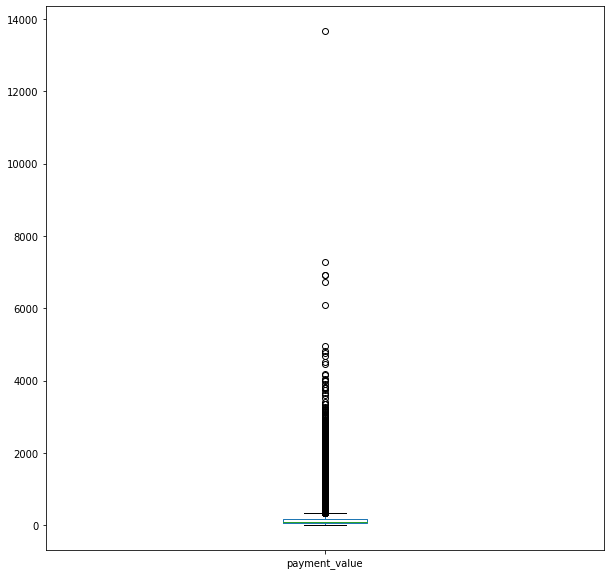

In [ ]:
#detecting outlier in payment_value

combined.boxplot(column='payment_value', fontsize=10, rot=0, grid=False, figsize=(10, 10))

In [ ]:
q1 = combined['payment_value'].quantile(0.25)
q3 = combined['payment_value'].quantile(0.75)
iqr = q3 - q1
boxplot_min = q1 - 1.5 * iqr
boxplot_max = q3 + 1.5 * iqr
print('Q1:\n', q1)
print('\nQ3:\n', q3)
print('\nIQR:\n', iqr)
print('\nMin:\n', boxplot_min)
print('\nMax:\n', boxplot_max)

Q1:
 56.79

Q3:
 171.8375

IQR:
 115.04750000000001

Min:
 -115.78125000000003

Max:
 344.40875000000005


In [ ]:
len(combined)

103886

In [ ]:
filter_price_min = combined['payment_value']<boxplot_min
filter_price_max = combined['payment_value']>boxplot_max

combined_non_outlier = combined[~(filter_price_min|filter_price_max)]

combined_non_outlier

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103880,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-06 11:08:08,2017-03-22,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,1,credit_card,3,155.99
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,credit_card,5,271.01


In [ ]:
len(combined_non_outlier)

95905

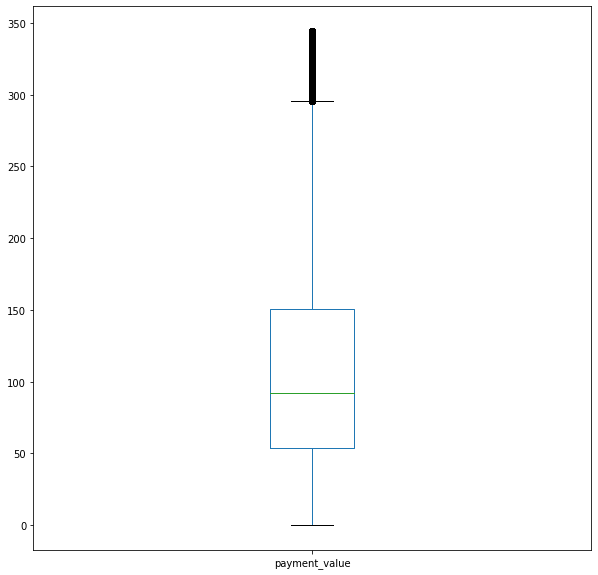

In [ ]:
combined_non_outlier.boxplot(column='payment_value', fontsize=10, rot=0, grid=False, figsize=(10, 10))

#Descriptive Statistics



In [ ]:
combined_non_outlier['payment_value'].describe()

count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

In [ ]:
range_pay_value = max(combined_non_outlier['payment_value']) - min(combined_non_outlier['payment_value'])

print('range payment_value = ', range_pay_value)

range payment_value =  344.34


In [ ]:
import statistics

In [ ]:
var_pay_value = statistics.variance(combined_non_outlier['payment_value'])

print('variance payment_value = ',var_pay_value)


variance payment_value =  5297.6640299796845


In [ ]:
skew_pay_value = combined_non_outlier['payment_value'].skew()

print('skew payment_value = ',skew_pay_value )

skew payment_value =  0.9966923626854844


In [ ]:
skew_pay_value = combined_non_outlier['payment_value'].kurtosis()

print('kurtosis payment_value = ',skew_pay_value )

kurtosis payment_value =  0.48854563868790324


From the above descriptive statistics, we can see:

The payment value of all the orders have an average of R$110.06. 

The maximum value of payment is R$344.34.

The minimum value of payment is R$0. 

Based on the calculation, we also can see that the curve is positively skewed.  

#EDA & Visualization 

##Finding out the number of orders per month



In [ ]:
#first, we make a new column which consist the month of the timestamp when customer made an order
combined_non_outlier['month_order'] = combined_non_outlier['order_purchase_timestamp'].dt.to_period('M').astype('str')

#then, we do the groupping to see how many orders were made each month
eda1 = combined_non_outlier['order_id'].groupby(combined_non_outlier['month_order']).nunique()
eda1 = pd.DataFrame(eda1)
eda1.reset_index(inplace=True)
eda1.columns = ['month', 'number_of_orders']
eda1.sort_values('month', ascending=True, inplace=True)
eda1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,number_of_orders
0,2016-09,3
1,2016-10,285
2,2016-12,1
3,2017-01,705
4,2017-02,1636
5,2017-03,2460
6,2017-04,2190
7,2017-05,3405
8,2017-06,3007
9,2017-07,3751


Based, on the analysis, let's make a visualization:

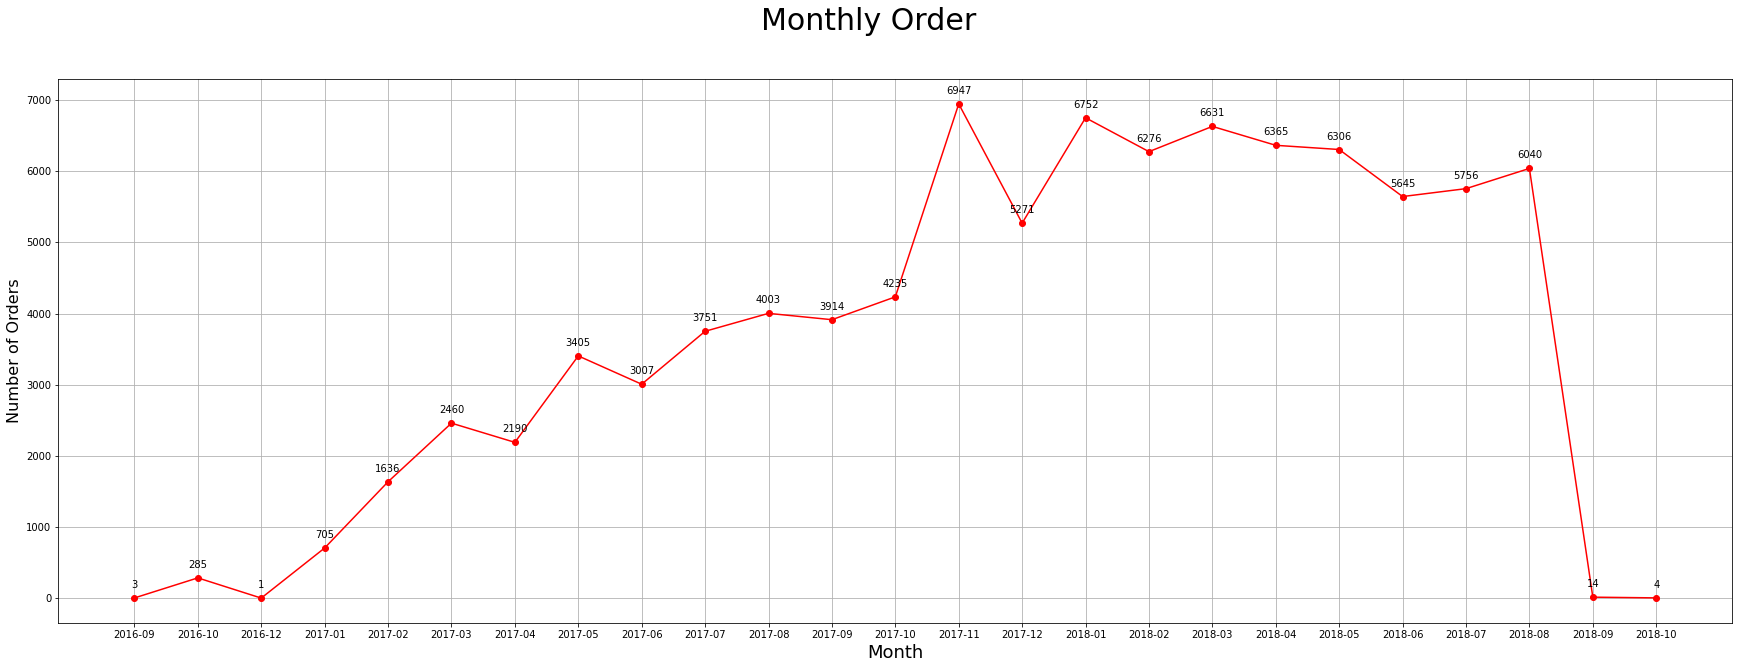

In [ ]:
fig = plt.figure(figsize=(30, 10))

fig.suptitle('Monthly Order', fontsize=30)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Orders', fontsize=16)

x = eda1['month']
y = eda1['number_of_orders']

plt.plot(x,y,'ro-')

for x,y in zip(x,y):

    label = "{:.0f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 
plt.grid(True)
plt.show()

From the data, we can see that October 2017 was the busiest month, and December 2016 was the quietest month. There was also a significant drop happened from August 2018 to September 2018, from 6040 orders to only 14 orders.

##Finding out daily orders trend

In [ ]:
#first, we make a new column which consist the name of the day of timestamp when customer made an order
combined_non_outlier['order_purchase_day'] = combined_non_outlier['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

#then, we do the groupping to see which day of the week is the busiest
eda2 = combined_non_outlier['order_id'].groupby(combined_non_outlier['order_purchase_day']).nunique()
eda2 = pd.DataFrame(eda2)
eda2.reset_index(inplace=True)
eda2.columns = ['day_of_the_week', 'number_of_orders']
eda2.sort_values('number_of_orders', ascending=False, inplace=True)
eda2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,day_of_the_week,number_of_orders
1,Mon,14890
5,Tue,14729
6,Wed,14307
4,Thu,13601
0,Fri,12965
3,Sun,11099
2,Sat,10011


Based on the analysis, let's make a visualization:

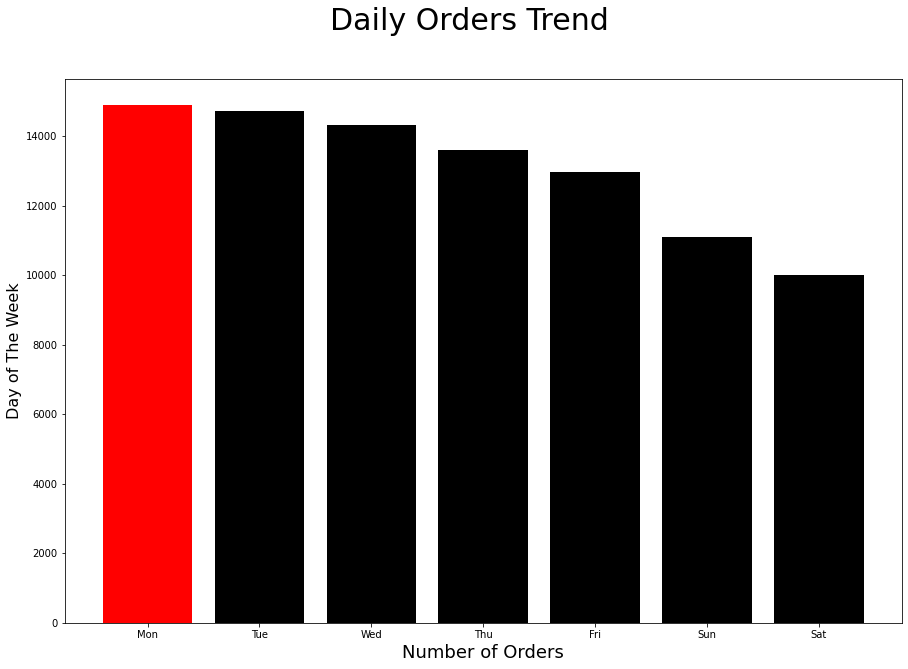

In [ ]:
fig = plt.figure(figsize=(15, 10))

fig.suptitle('Daily Orders Trend', fontsize=30)
plt.xlabel('Number of Orders', fontsize=18)
plt.ylabel('Day of The Week', fontsize=16)

x = eda2['day_of_the_week']
y = eda2['number_of_orders']
plt.bar(x, y, color=['red', 'black', 'black', 'black','black','black','black'])
plt.show()

The data shows that Monday turned out to be the buesiest day of the week, followed by Tuesday and Wednesday, respectively. 
Surprisingly, weekend, which consists of Saturday and Sunday are the quietest days. It seems that customer rarely made an order on weekends.
The company can make use of this information to know which day might be the best day to launch a campaign or promotion.

##Finding out percentage of orders per payment type

In [ ]:
#making a groupping to find out how many orders are made with certain payment type
eda3 = combined_non_outlier.groupby('payment_type')['order_id'].nunique()
eda3 = pd.DataFrame(eda3)
eda3.reset_index(inplace=True)
eda3.columns = ['payment_type', 'number_of_orders']
eda3

,payment_type,number_of_orders
0,boleto,18504
1,credit_card,70031
2,debit_card,1443
3,not_defined,3
4,voucher,3792


In [ ]:
#dropping the type of payment: not_defined as it is not necessary for the visualization
dropped_eda3 = eda3.drop(3)
dropped_eda3

,payment_type,number_of_orders
0,boleto,18504
1,credit_card,70031
2,debit_card,1443
4,voucher,3792


In [ ]:
#after that, we make a percentage of each payment type

dropped_eda3['percent'] = (dropped_eda3['number_of_orders'] / 
                  dropped_eda3['number_of_orders'].sum()) * 100
dropped_eda3

,payment_type,number_of_orders,percent
0,boleto,18504,19.733390
1,credit_card,70031,74.683801
2,debit_card,1443,1.538872
4,voucher,3792,4.043937


Based on the analysis, let's make a visualization:

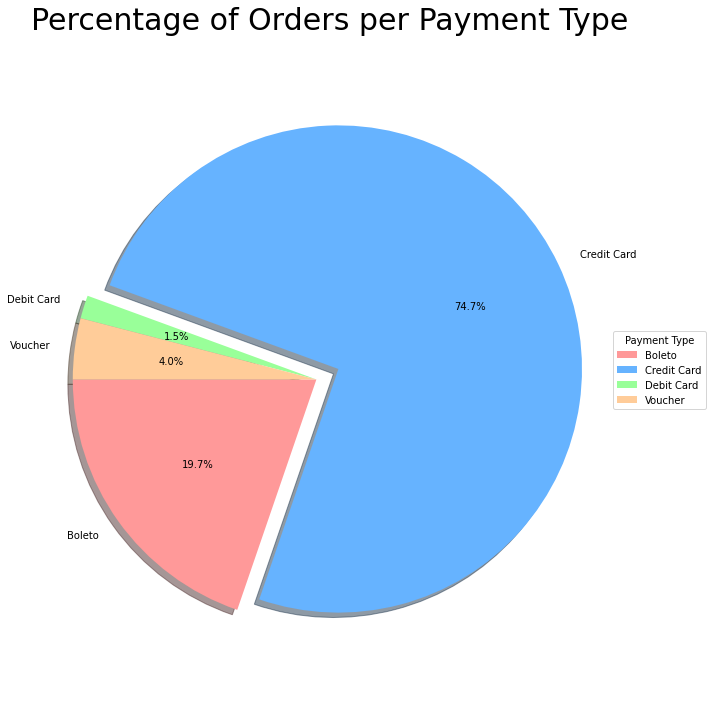

In [ ]:
labels = ['Boleto', 'Credit Card', 'Debit Card', 'Voucher']
sizes = [19.732759, 74.681411, 1.538822, 4.043808]
explode = (0, 0.1, 0, 0)  
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(10, 10))
my_data = dropped_eda3['number_of_orders']
plt.pie(my_data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180, explode=explode, colors=colors)
plt.title('Percentage of Orders per Payment Type', fontsize=30)
plt.axis('equal')
plt.legend(labels,
          title ="Payment Type",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

Based on the data, Credit Card is the most used type of payment, followed by Boleto in second place. This should gives an idea for the company about the preferred payment method of customers which can help them to assess the existing promotions or offers.

##Customer Segmentation

#Customer Segmentation

##Preparation for Clustering

In [ ]:
df = combined_non_outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95905 entries, 0 to 103885
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95905 non-null  object        
 1   customer_id                    95905 non-null  object        
 2   order_status                   95905 non-null  object        
 3   order_purchase_timestamp       95905 non-null  datetime64[ns]
 4   order_approved_at              95905 non-null  datetime64[ns]
 5   order_delivered_customer_date  95905 non-null  datetime64[ns]
 6   order_estimated_delivery_date  95905 non-null  datetime64[ns]
 7   customer_unique_id             95905 non-null  object        
 8   customer_zip_code_prefix       95905 non-null  object        
 9   customer_city                  95905 non-null  object        
 10  customer_state                 95905 non-null  object        
 11  payment_sequen

In [ ]:
numerical_column = ['payment_sequential', 'payment_installments','payment_value']

string_column = ['order_id','customer_id', 'order_status', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_type']

In [ ]:
df[numerical_column].describe()

,payment_sequential,payment_installments,payment_value
count,95905.000000,95905.000000,95905.000000
mean,1.099546,2.628320,110.062133
std,0.734353,2.451581,72.785054
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.200000
75%,1.000000,3.000000,150.580000
max,29.000000,24.000000,344.340000


In [ ]:
df[string_column].describe()

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_type
count,95905,95905,95905,95905,95905,95905,95905,95905
unique,91602,91602,8,88610,14699,3998,27,5
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,9a736b248f67d166d2fbb006bcb877c3,24220,sao paulo,SP,credit_card
freq,29,29,93120,33,130,15214,40903,70269


Data Overview:

- There are 91.602 users in the cleaned dataset
- Mean payment value of user is 110 with most of the orders came from Sao Paulo
- Most of the user do 1x payment sequential and most of the user do 2x payment installment

##Clustering


Scalling the numerical column

In [ ]:
df_cluster = df.copy()
scaler = MinMaxScaler()
df_cluster[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
df_cluster

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,month_order,order_purchase_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0.000000,credit_card,0.041667,0.052622,2017-10,Mon
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0.071429,voucher,0.041667,0.005808,2017-10,Mon
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0.035714,voucher,0.041667,0.053987,2017-10,Mon
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,0.000000,boleto,0.041667,0.410815,2018-07,Tue
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0.000000,credit_card,0.125000,0.520184,2018-08,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103880,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-06 11:08:08,2017-03-22,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,0.000000,credit_card,0.125000,0.453012,2017-02,Thu
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,0.000000,credit_card,0.125000,0.247081,2017-03,Thu
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,0.000000,credit_card,0.125000,0.566301,2018-02,Tue
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,0.000000,credit_card,0.208333,0.787042,2017-08,Sun


Dropping unimportant columns

In [ ]:
df_cluster.drop(labels=['customer_state','payment_type','customer_id','order_id', 'order_status', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city','order_purchase_timestamp','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date','month_order','order_purchase_day'],axis=1,inplace=True)

Determining cluster number

<Figure size 1152x576 with 0 Axes>

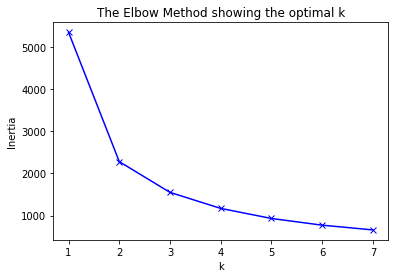

In [ ]:
import matplotlib.pyplot as plt
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.4512822789509496
For n_clusters = 4 The average silhouette_score is : 0.4733435118465973
For n_clusters = 5 The average silhouette_score is : 0.41781333770630164


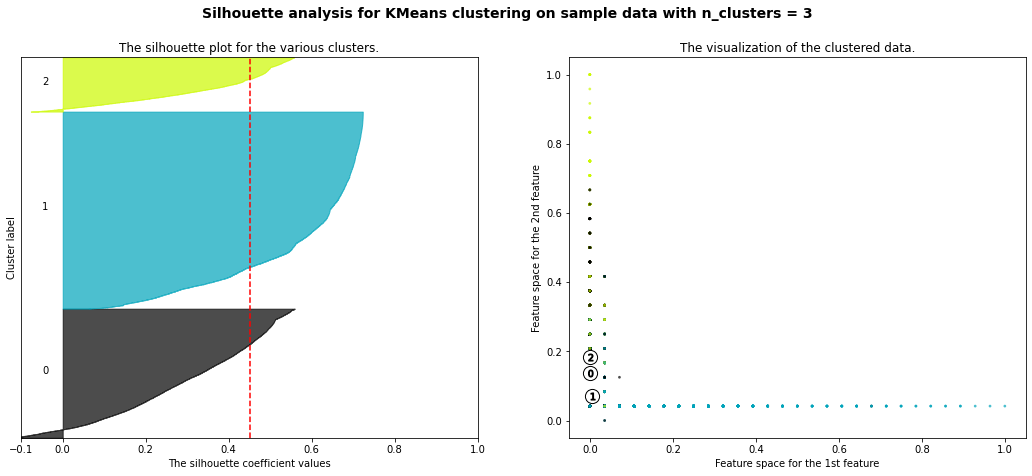

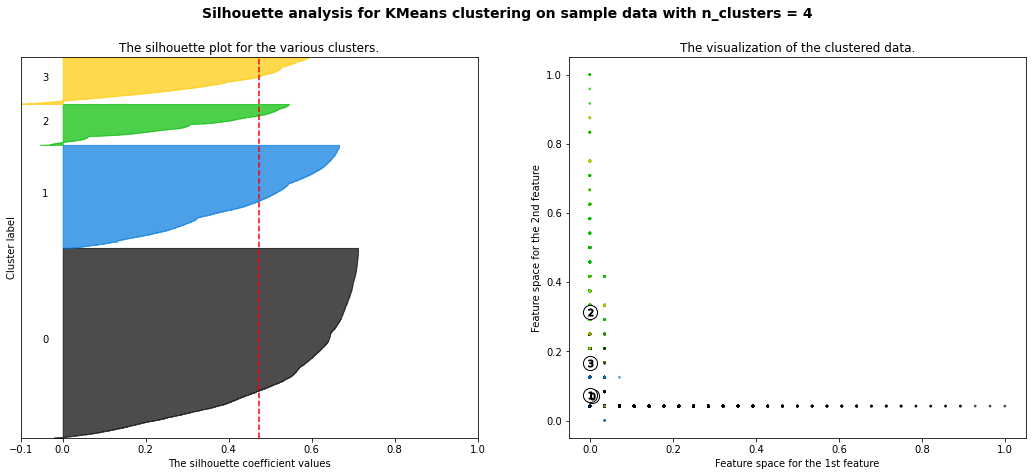

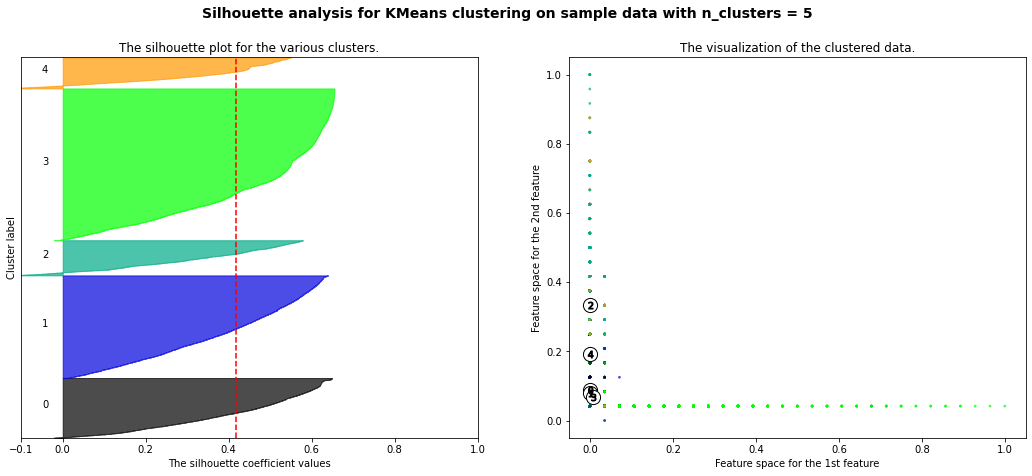

In [ ]:
silhoutte_analysis(df_cluster,[3,4,5])

Based on both elbow method and silhoutte analysis, we can conclude that the ideal number for cluster is 4. Now, let's create the cluster

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,month_order,order_purchase_day,cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,2017-10,Mon,2
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,2017-10,Mon,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,2017-10,Mon,2
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,2018-07,Tue,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,2018-08,Wed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103880,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-06 11:08:08,2017-03-22,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,1,credit_card,3,155.99,2017-02,Thu,1
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1,credit_card,3,85.08,2017-03,Thu,2
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,credit_card,3,195.00,2018-02,Tue,1
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,credit_card,5,271.01,2017-08,Sun,3


Checking aggregation for each cluster

In [ ]:
df.groupby(['cluster'])['payment_value'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,10307,134.609804,131.470,286.78,37.67
1,25944,138.117105,134.345,204.20,95.37
2,47930,53.901169,54.000,96.31,0.00
3,11724,255.995606,247.505,344.34,190.86


In [ ]:
df.groupby(['cluster','payment_type'])['payment_value'].agg(['count','mean','median','max','min'])

count        mean   median     max     min
cluster payment_type                                            
0       credit_card   10307  134.609804  131.470  286.78   37.67
1       boleto         6473  139.597262  135.300  204.20   96.16
        credit_card   18076  138.027208  134.585  204.18   95.37
        debit_card      482  139.642884  134.920  203.78   96.26
        voucher         913  128.597360  118.350  202.89   96.20
2       boleto        10093   57.113080   56.380   96.13   11.62
        credit_card   32432   55.772008   56.055   96.14    0.01
        debit_card      813   55.099176   53.000   96.02   13.38
        not_defined       3    0.000000    0.000    0.00    0.00
        voucher        4589   33.438074   27.650   96.31    0.00
3       boleto         1938  257.695531  248.850  344.33  204.22
        credit_card    9454  255.719230  247.225  344.34  190.86
        debit_card      149  256.007114  246.820  340.07  204.34
        voucher         183  252.261639  250.000  341.02  204.49

In [ ]:
df.groupby(['cluster'])['payment_installments'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,10307,7.547104,8.0,24,5
1,25944,1.796562,1.0,4,0
2,47930,1.687962,1.0,8,0
3,11724,3.988997,3.0,24,1


Customer segmentation naming

Summary:
- Cluster characteristics:
  - 0: average spender, mostly using credit card, mostly using 1x payment installment 
  - 1: lowest spender, mostly using credit card, biggest part of the total customers, mostly using 1x payment installment  
  - 2: highest spender, mostly using credit card, mostly using 3x payment installment  
  - 3: average spender, mostly using credit card, smaller part of the total customers, mostly using 8x payment installment 
  
Based on those characteristics, we then divided the customer into 4 groups:

- 0: Gold tier customer
- 1: Silver tier customer
- 2: Platinum tier customer
- 3: Bronze tier customer